In [142]:
# Importing libraries for data preparation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [9]:
datasetPath = "GMD.csv"
df= pd.read_csv(datasetPath)

In [10]:
df.head()

,countryname,ISO3,year,nGDP,rGDP,rGDP_pc,rGDP_USD,deflator,cons,rcons,...,ltrate,cbrate,M0,M1,M2,M3,M4,SovDebtCrisis,CurrencyCrisis,BankingCrisis
0,Aruba,ABW,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_indo=df.loc[(df['countryname']== 'Indonesia') & (df['nGDP'].notna()),:]

In [15]:
df_indo.head()

,countryname,ISO3,year,nGDP,rGDP,rGDP_pc,rGDP_USD,deflator,cons,rcons,...,ltrate,cbrate,M0,M1,M2,M3,M4,SovDebtCrisis,CurrencyCrisis,BankingCrisis
23164,Indonesia,IDN,1921,6218.7144,226642848.0,4747743.0,NaN,0.002744,NaN,NaN,...,NaN,NaN,0.024133,NaN,NaN,NaN,NaN,0.0,0.0,0.0
23165,Indonesia,IDN,1922,5667.7373,232645584.0,4822617.5,NaN,0.002436,NaN,NaN,...,NaN,NaN,0.022441,NaN,NaN,NaN,NaN,0.0,0.0,0.0
23166,Indonesia,IDN,1923,5523.6738,237388336.0,4860055.0,NaN,0.002327,NaN,NaN,...,NaN,NaN,0.022220,NaN,NaN,NaN,NaN,0.0,0.0,0.0
23167,Indonesia,IDN,1924,5974.8184,250086176.0,5057452.0,NaN,0.002389,NaN,NaN,...,NaN,NaN,0.023250,NaN,NaN,NaN,NaN,0.0,0.0,0.0
23168,Indonesia,IDN,1925,6347.6123,255016128.0,5094890.0,NaN,0.002489,NaN,NaN,...,NaN,NaN,0.028400,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [16]:
df_indo.describe()

,year,nGDP,rGDP,rGDP_pc,rGDP_USD,deflator,cons,rcons,cons_GDP,inv,...,ltrate,cbrate,M0,M1,M2,M3,M4,SovDebtCrisis,CurrencyCrisis,BankingCrisis
count,98.000000,9.800000e+01,9.800000e+01,9.800000e+01,5.900000e+01,98.000000,6.600000e+01,6.400000e+01,66.000000,7.000000e+01,...,12.000000,36.000000,8.700000e+01,7.000000e+01,6.700000e+01,3.300000e+01,0.0,86.000000,86.000000,86.000000
mean,1978.367347,3.960945e+09,3.590455e+09,1.660292e+07,4.295704e+05,39.313337,2.659226e+09,2.614627e+09,75.182298,1.748833e+09,...,7.118053,10.222083,7.057475e+07,5.500688e+08,8.824467e+08,2.320925e+09,NaN,0.023256,0.069767,0.023256
std,31.588327,7.735977e+09,4.317812e+09,1.421561e+07,3.435101e+05,60.644439,4.201823e+09,2.165018e+09,10.227663,2.715799e+09,...,0.705806,6.650340,1.548154e+08,1.141894e+09,1.603918e+09,2.347001e+09,NaN,0.151599,0.256249,0.151599
min,1921.000000,2.624724e+03,2.266428e+08,4.623407e+06,5.212518e+04,0.000933,3.311000e+05,3.362701e+08,60.729454,2.997152e+04,...,5.795833,3.500000,1.155142e-02,5.062647e+00,5.277404e+00,7.107834e+07,NaN,0.000000,0.000000,0.000000
25%,1956.250000,1.914520e+05,4.174563e+08,5.391367e+06,1.431690e+05,0.045476,1.536262e+07,6.901658e+08,67.893304,8.462188e+06,...,6.808750,6.000000,1.172800e+01,2.689845e+05,2.845956e+05,5.126636e+08,NaN,0.000000,0.000000,0.000000
50%,1980.500000,6.614346e+07,1.495674e+09,1.003894e+07,3.671352e+05,4.632313,2.053788e+08,1.944907e+09,72.354457,1.616927e+08,...,6.980077,7.875000,5.731562e+05,1.370282e+07,2.806719e+07,1.263644e+09,NaN,0.000000,0.000000,0.000000
75%,2004.750000,2.887298e+09,5.043676e+09,2.285894e+07,6.373532e+05,57.170175,3.725644e+09,3.902529e+09,78.924614,2.912079e+09,...,7.508558,12.832500,2.984952e+07,2.648415e+08,9.147916e+08,3.863275e+09,NaN,0.000000,0.000000,0.000000
max,2029.000000,3.258256e+10,1.652861e+10,5.602958e+07,1.235894e+06,197.128200,1.527896e+10,7.536107e+09,104.811650,1.009505e+10,...,8.221666,38.439999,6.546833e+08,4.834600e+09,6.136552e+09,7.940467e+09,NaN,1.000000,1.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56407 entries, 0 to 56406
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   countryname     56407 non-null  object 
 1   ISO3            56407 non-null  object 
 2   year            56407 non-null  int64  
 3   nGDP            19477 non-null  float64
 4   rGDP            20974 non-null  float64
 5   rGDP_pc         20538 non-null  float64
 6   rGDP_USD        15182 non-null  float64
 7   deflator        17474 non-null  float64
 8   cons            12760 non-null  float64
 9   rcons           14175 non-null  float64
 10  cons_GDP        12696 non-null  float64
 11  inv             15336 non-null  float64
 12  inv_GDP         15259 non-null  float64
 13  finv            14015 non-null  float64
 14  finv_GDP        13953 non-null  float64
 15  exports         25150 non-null  float64
 16  exports_GDP     16437 non-null  float64
 17  imports         24470 non-null 

In [19]:
df_indo.set_index('year', inplace=True)
df_indo.head()

,countryname,ISO3,nGDP,rGDP,rGDP_pc,rGDP_USD,deflator,cons,rcons,cons_GDP,...,ltrate,cbrate,M0,M1,M2,M3,M4,SovDebtCrisis,CurrencyCrisis,BankingCrisis
year,,,,,,,,,,,,,,,,,,,,,
1921,Indonesia,IDN,6218.7144,226642848.0,4747743.0,NaN,0.002744,NaN,NaN,NaN,...,NaN,NaN,0.024133,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1922,Indonesia,IDN,5667.7373,232645584.0,4822617.5,NaN,0.002436,NaN,NaN,NaN,...,NaN,NaN,0.022441,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1923,Indonesia,IDN,5523.6738,237388336.0,4860055.0,NaN,0.002327,NaN,NaN,NaN,...,NaN,NaN,0.022220,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1924,Indonesia,IDN,5974.8184,250086176.0,5057452.0,NaN,0.002389,NaN,NaN,NaN,...,NaN,NaN,0.023250,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1925,Indonesia,IDN,6347.6123,255016128.0,5094890.0,NaN,0.002489,NaN,NaN,NaN,...,NaN,NaN,0.028400,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [23]:
df_indo.index = pd.to_datetime(df_indo.index, format='%Y')

In [28]:
df_indo.head()

,countryname,ISO3,nGDP,rGDP,rGDP_pc,rGDP_USD,deflator,cons,rcons,cons_GDP,...,cbrate,M0,M1,M2,M3,M4,SovDebtCrisis,CurrencyCrisis,BankingCrisis,year
year,,,,,,,,,,,,,,,,,,,,,
1921-01-01,Indonesia,IDN,6218.7144,226642848.0,4747743.0,NaN,0.002744,NaN,NaN,NaN,...,NaN,0.024133,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1921
1922-01-01,Indonesia,IDN,5667.7373,232645584.0,4822617.5,NaN,0.002436,NaN,NaN,NaN,...,NaN,0.022441,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1922
1923-01-01,Indonesia,IDN,5523.6738,237388336.0,4860055.0,NaN,0.002327,NaN,NaN,NaN,...,NaN,0.022220,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1923
1924-01-01,Indonesia,IDN,5974.8184,250086176.0,5057452.0,NaN,0.002389,NaN,NaN,NaN,...,NaN,0.023250,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1924
1925-01-01,Indonesia,IDN,6347.6123,255016128.0,5094890.0,NaN,0.002489,NaN,NaN,NaN,...,NaN,0.028400,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1925


In [26]:
df_indo['year'] = df_indo.index.year

C:\Users\user\AppData\Local\Temp\ipykernel_26848\3842736966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indo['year'] = df_indo.index.year


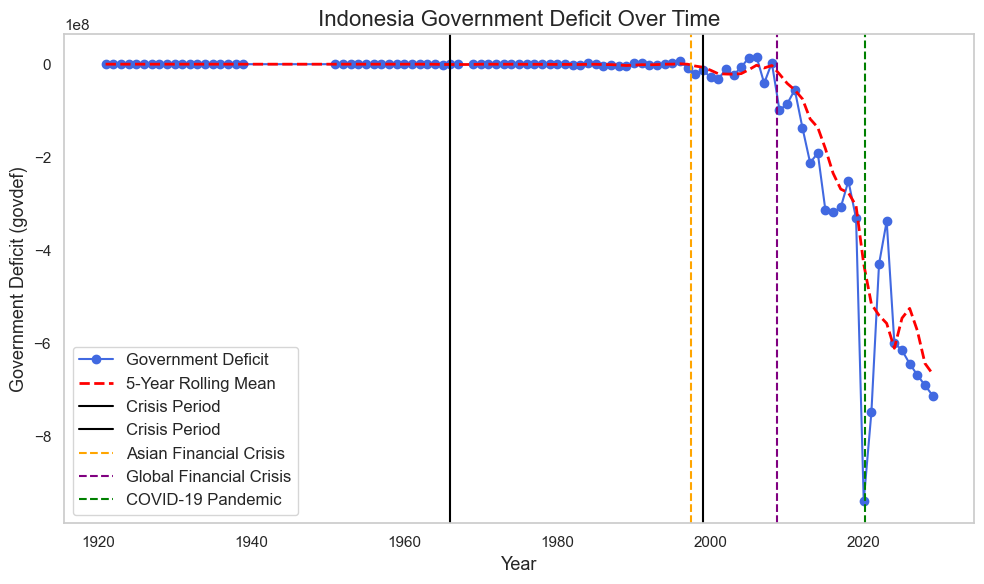

In [48]:
# Enhanced visualization of Indonesia Government Deficit Over Time

plt.figure(figsize=(10, 6))

# Plot the time series with a line and markers
plt.plot(df_indo.index, df_indo['govdef'], marker='o', linestyle='-', color='royalblue', label='Government Deficit')

# Add a rolling mean (window=5 years) for trend visualization
rolling_mean = df_indo['govdef'].rolling(window=5, min_periods=1).mean()
plt.plot(df_indo.index, rolling_mean, color='red', linestyle='--', linewidth=2, label='5-Year Rolling Mean')

# Highlight recession/crisis periods if available (example: SovDebtCrisis)
if 'SovDebtCrisis' in df_indo.columns:
    crisis_years = df_indo[df_indo['SovDebtCrisis'] == 1].index
    for year in crisis_years:
        plt.axvline(x=year, color='black', linestyle='-', alpha=1, label='Crisis Period')
# Add annotations for significant events (example: Asian Financial Crisis)

# add a vertical line for the Asian Financial Crisis
plt.axvline(x=pd.Timestamp('1997-07-01'), color='orange', linestyle='--', linewidth=1.5, label='Asian Financial Crisis')

#add a vertical line for the Global Financial Crisis
plt.axvline(x=pd.Timestamp('2008-09-01'), color='purple', linestyle='--', linewidth=1.5, label='Global Financial Crisis')

# add a vertical line for the COVID-19 pandemic
plt.axvline(x=pd.Timestamp('2020-03-01'), color='green', linestyle='--', linewidth=1.5, label='COVID-19 Pandemic')

plt.title('Indonesia Government Deficit Over Time', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Government Deficit (govdef)', fontsize=13)
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

In [57]:
# Check for missing values
missing_govdef = df_indo['govdef_GDP'].isna().sum()
print(f"Missing values in 'govdef': {missing_govdef}")

Missing values in 'govdef': 1


In [58]:
# Step 2: Data Preparation
# ------------------------
# Drop missing values for ARIMA modeling.
govdef_series = df_indo['govdef_GDP'].dropna()

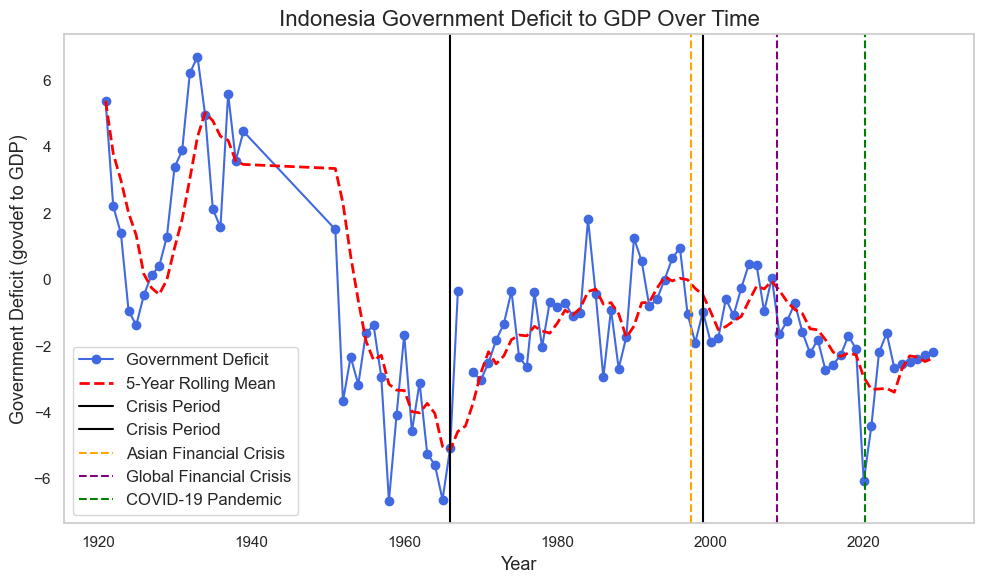

In [61]:
# Enhanced visualization of Indonesia Government Deficit Over Time

plt.figure(figsize=(10, 6))

# Plot the time series with a line and markers
plt.plot(df_indo.index, df_indo['govdef_GDP'], marker='o', linestyle='-', color='royalblue', label='Government Deficit')

# Add a rolling mean (window=5 years) for trend visualization
rolling_mean = df_indo['govdef_GDP'].rolling(window=5, min_periods=1).mean()
plt.plot(df_indo.index, rolling_mean, color='red', linestyle='--', linewidth=2, label='5-Year Rolling Mean')

# Highlight recession/crisis periods if available (example: SovDebtCrisis)
if 'SovDebtCrisis' in df_indo.columns:
    crisis_years = df_indo[df_indo['SovDebtCrisis'] == 1].index
    for year in crisis_years:
        plt.axvline(x=year, color='black', linestyle='-', alpha=1, label='Crisis Period')
# Add annotations for significant events (example: Asian Financial Crisis)

# add a vertical line for the Asian Financial Crisis
plt.axvline(x=pd.Timestamp('1997-07-01'), color='orange', linestyle='--', linewidth=1.5, label='Asian Financial Crisis')

#add a vertical line for the Global Financial Crisis
plt.axvline(x=pd.Timestamp('2008-09-01'), color='purple', linestyle='--', linewidth=1.5, label='Global Financial Crisis')

# add a vertical line for the COVID-19 pandemic
plt.axvline(x=pd.Timestamp('2020-03-01'), color='green', linestyle='--', linewidth=1.5, label='COVID-19 Pandemic')

plt.title('Indonesia Government Deficit to GDP Over Time', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Government Deficit (govdef to GDP)', fontsize=13)
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

In [62]:
# Step 3: Stationarity Check
# --------------------------
# Use Augmented Dickey-Fuller test to check stationarity.
adf_result = adfuller(govdef_series)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing is needed.")

ADF Statistic: -3.247123343050383
p-value: 0.017413976628665024
The series is stationary.


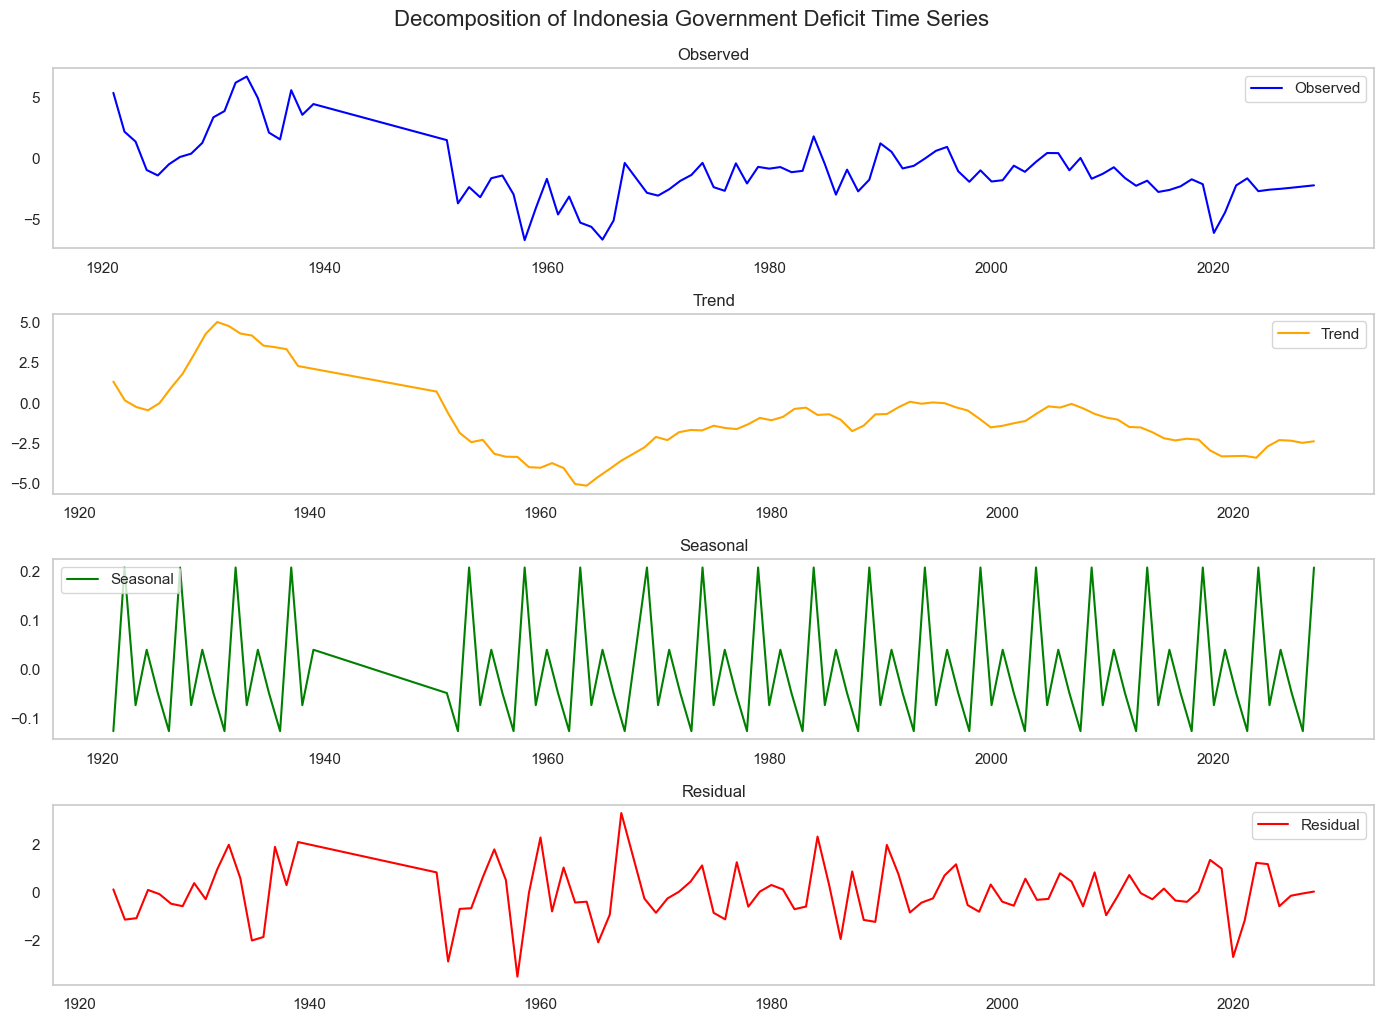

In [67]:
# Decompose the time series to visualize trend, seasonality, and residuals
decomposition = seasonal_decompose(govdef_series, model='additive', period=5)

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed')
plt.grid(False)
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.grid(False)
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.grid(False)
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.suptitle('Decomposition of Indonesia Government Deficit Time Series', fontsize=16, y=1.02)
plt.grid(False)
plt.show()

# Explanation:
# - The "Observed" plot shows the original government deficit time series.
# - The "Trend" plot reveals the long-term movement or direction in the data.
# - The "Seasonal" plot displays any repeating patterns or cycles (if present).
# - The "Residual" plot shows what's left after removing trend and seasonality, indicating irregular fluctuations.

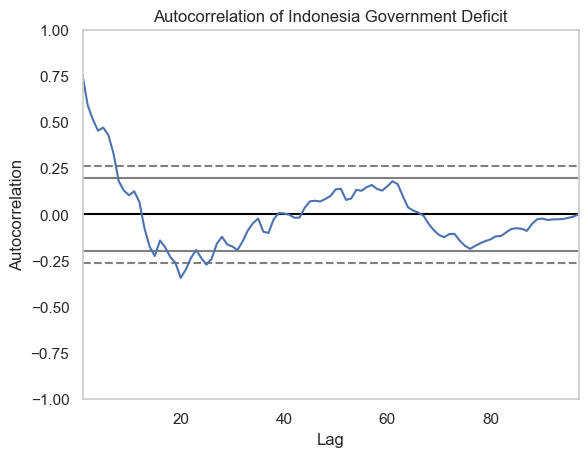

In [68]:
# Plot autocorrelation for the Indonesia government deficit series
autocorrelation_plot(govdef_series)
plt.title('Autocorrelation of Indonesia Government Deficit')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [70]:
# Step 4: Differencing (if needed)
# --------------------------------
# If not stationary, difference the series.
if adf_result[1] >= 0.05:
    govdef_series_diff = govdef_series.diff().dropna()
    adf_result_diff = adfuller(govdef_series_diff)
    print('ADF Statistic after differencing:', adf_result_diff[0])
    print('p-value after differencing:', adf_result_diff[1])
    if adf_result_diff[1] < 0.05:
        print("The differenced series is stationary.")
    else:
        print("Further differencing may be required.")
else:
    govdef_series_diff = govdef_series
    print("The original series is stationary, no differencing needed.")

The original series is stationary, no differencing needed.


In [78]:
# Train-test split for time series (before model selection)
# Use the last 10 years as test set, rest as train set

test_size = 10
train_series = govdef_series.iloc[:-test_size]
test_series = govdef_series.iloc[-test_size:]

print("Train series length:", len(train_series))
print("Test series length:", len(test_series))
print("Train series last year:", train_series.index[-1])
print("Test series first year:", test_series.index[0])

Train series length: 87
Test series length: 10
Train series last year: 2019-01-01 00:00:00
Test series first year: 2020-01-01 00:00:00


In [147]:
# Step 5: Model Selection with auto_arima
# ---------------------------------------
# Use auto_arima to find the best ARIMA parameters.
stepwise_model = auto_arima(
    govdef_series,
    max_order=None,
    start_p=0,
    max_p=5,
    start_q=0,
    max_q=5,
    m=1,  # Monthly data, set to 1 for yearly data
    max_d=5,
    max_P=5,
    max_Q=5,
    max_D=5,
    seasonal=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=377.791, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=378.593, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=377.656, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=375.998, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.433 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   97
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -186.999
Date:                Sun, 01 Jun 2025   AIC                            375.998
Time:                        08:21:07   BIC                            378.563
Sample:                             0   HQIC                           377.035
                                 - 97                                         
Covari

In [158]:
# Step 6: Fit ARIMA Model
# -----------------------
# Fit the ARIMA model with the selected order.
order = stepwise_model.order
seasonal= stepwise_model.seasonal_order
model = SARIMAX(govdef_series, order=(2,1,1), seasonal_order=seasonal,enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             govdef_GDP   No. Observations:                   97
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -177.521
Date:                Sun, 01 Jun 2025   AIC                            363.041
Time:                        08:24:14   BIC                            373.215
Sample:                             0   HQIC                           367.151
                                 - 97                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3613      0.258      1.403      0.161      -0.143       0.866
ar.L2         -0.1482      0.114     -1.295      0.195      -0.373       0.076
ma.L1         -0.5712      0.250     -2.288      0.0

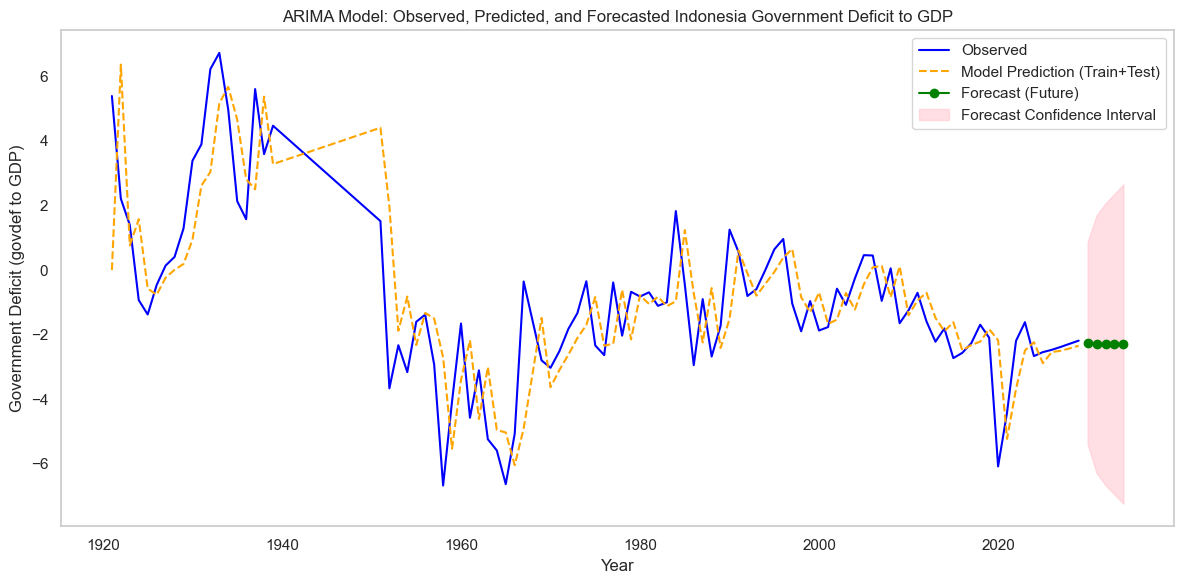

In [159]:
# Step 7: Forecasting
# -------------------
# Visualization: Observed, In-sample Prediction, Out-of-sample Forecast
plt.figure(figsize=(12, 6))
# Plot observed series
plt.plot(govdef_series, label='Observed', color='blue')
""""
# In-sample prediction (train + test period)
insample_pred = model_fit.get_prediction(start=govdef_series.index[0], end=govdef_series.index[86])
insample_pred_mean = insample_pred.predicted_mean
plt.plot(train_series.index, insample_pred_mean, label='Model Prediction (Train)', color='orange', linestyle='--')

#test series
start_test= len(train_series)
end_test= len(govdef_series)-1
insample_pred_test= model_fit.predict(start=start_test, end=end_test)
# Plot in-sample prediction for test set
plt.plot(test_series.index, insample_pred_test, label='Model Prediction (Test)', color='purple', linestyle='--')
"""

insample_pred = model_fit.get_prediction(start=govdef_series.index[0], end=govdef_series.index[-1])
insample_pred_mean = insample_pred.predicted_mean
plt.plot(govdef_series.index, insample_pred_mean, label='Model Prediction (Train+Test)', color='orange', linestyle='--')

# Out-of-sample forecast (future)
# Forecast the next 5 years.
n_periods = 5  # Number of periods to forecast (e.g., 10 years)
forecast = model_fit.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=govdef_series.index[-1] + pd.DateOffset(years=1), periods=n_periods, freq='YS')
forecast_values = forecast.predicted_mean
plt.plot(forecast_index, forecast_values, label='Forecast (Future)', marker='o', color='green')

# Confidence interval for forecast
conf_int = forecast.conf_int()
plt.fill_between(
    forecast_index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink', alpha=0.5, label='Forecast Confidence Interval'
)
'''
# Annotate each forecast point with its value
for x, y in zip(forecast_index, forecast_values):
    plt.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8), ha='center', fontsize=9, color='green')
'''
    
plt.title('ARIMA Model: Observed, Predicted, and Forecasted Indonesia Government Deficit to GDP')
plt.xlabel('Year')
plt.ylabel('Government Deficit (govdef to GDP)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

Model Evaluation on Test Set:
Mean Absolute Error (MAE): 1.2620
Root Mean Squared Error (RMSE): 1.7221
R-squared (R2): 0.5617


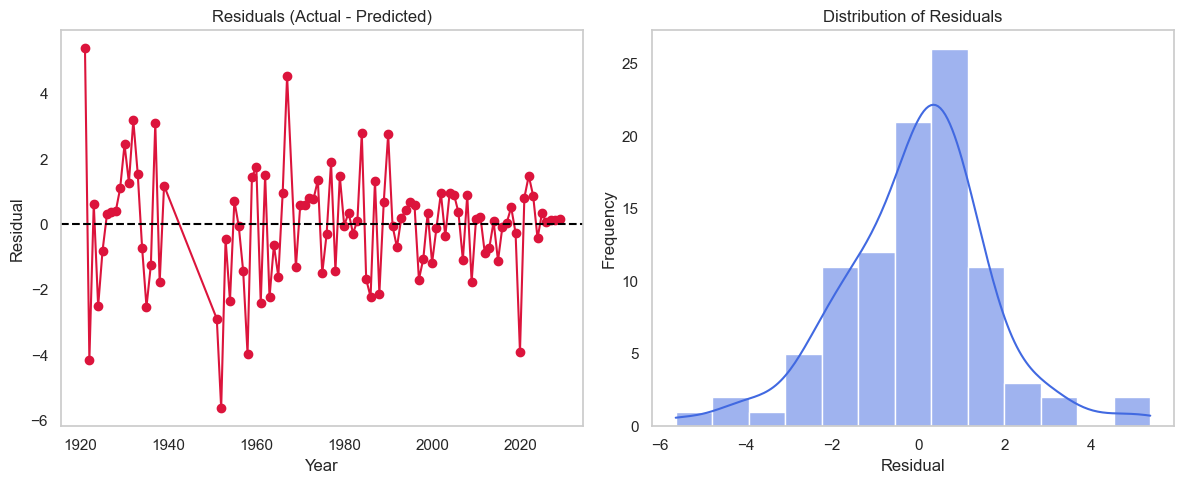


Explanation:
- The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) provide measures of average prediction error; lower values indicate better fit.
- The R-squared (R2) value shows the proportion of variance in the test data explained by the model; values closer to 1 indicate a better fit.
- The residual plot should show no clear pattern (random scatter around zero), indicating that the model has captured the structure in the data.
- The histogram of residuals should be roughly symmetric and centered at zero, suggesting unbiased predictions.
- If residuals show patterns or are not centered at zero, it may indicate model misspecification or unaccounted structure in the data.



In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 9: Model Evaluation
# ------------------------
# Evaluate the ARIMA model using multiple metrics and residual analysis


# 1. Calculate predictions for the test set
pred_test = model_fit.predict(start=govdef_series.index[0], end=govdef_series.index[-1])
actual_test = govdef_series

# 2. Evaluation Metrics
mse = mean_squared_error(actual_test, pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_test, pred_test)
r2 = r2_score(actual_test, pred_test)

print("Model Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 3. Residual Analysis
residuals = actual_test - pred_test

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(govdef_series.index, residuals, marker='o', linestyle='-', color='crimson')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.grid(False)

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='royalblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(False)

plt.tight_layout()
plt.show()

# 4. Explanation:
print("""
Explanation:
- The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) provide measures of average prediction error; lower values indicate better fit.
- The R-squared (R2) value shows the proportion of variance in the test data explained by the model; values closer to 1 indicate a better fit.
- The residual plot should show no clear pattern (random scatter around zero), indicating that the model has captured the structure in the data.
- The histogram of residuals should be roughly symmetric and centered at zero, suggesting unbiased predictions.
- If residuals show patterns or are not centered at zero, it may indicate model misspecification or unaccounted structure in the data.
""")

In [161]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Forecasting govdef_series using Decision Tree Regression
# 1. Data Preparation
# -------------------
# For Decision Tree, we need to convert the time series into a supervised learning problem.
# We'll use previous values (lags) as features to predict the next value.

def create_lagged_features(series, n_lags=3):
    df_lagged = pd.DataFrame({'y': series})
    for lag in range(1, n_lags + 1):
        df_lagged[f'lag_{lag}'] = series.shift(lag)
    df_lagged = df_lagged.dropna()
    return df_lagged

n_lags = 3
lagged_df = create_lagged_features(govdef_series, n_lags=n_lags)
lagged_df.head()

,y,lag_1,lag_2,lag_3
year,,,,
1924-01-01,-0.930626,1.395561,2.207359,5.385084
1925-01-01,-1.373681,-0.930626,1.395561,2.207359
1926-01-01,-0.461894,-1.373681,-0.930626,1.395561
1927-01-01,0.138999,-0.461894,-1.373681,-0.930626
1928-01-01,0.407581,0.138999,-0.461894,-1.373681


In [162]:
# 2. Train-Test Split
# -------------------
# Use the same test size as before (last 10 years for testing)
X = lagged_df.drop('y', axis=1)
y = lagged_df['y']

X_train, X_test = X.iloc[:-test_size], X.iloc[-test_size:]
y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]

In [163]:
X_train

,lag_1,lag_2,lag_3
year,,,
1924-01-01,1.395561,2.207359,5.385084
1925-01-01,-0.930626,1.395561,2.207359
1926-01-01,-1.373681,-0.930626,1.395561
1927-01-01,-0.461894,-1.373681,-0.930626
1928-01-01,0.138999,-0.461894,-1.373681
...,...,...,...
2015-01-01,-1.805000,-2.217000,-1.586000
2016-01-01,-2.724000,-1.805000,-2.217000
2017-01-01,-2.561000,-2.724000,-1.805000


In [164]:
# 3. Model Selection & Hyperparameter Tuning
# ------------------------------------------
# Use GridSearchCV with TimeSeriesSplit to find the best max_depth for the Decision Tree

tscv = TimeSeriesSplit(n_splits=5)
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]}
dtree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dtree, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print(f"Best Decision Tree max_depth: {grid_search.best_params_['max_depth']}")

Best Decision Tree max_depth: 4


In [165]:
# 4. Prediction
# -------------
y_pred = best_tree.predict(X_test)
y_train_pred = best_tree.predict(X_train)

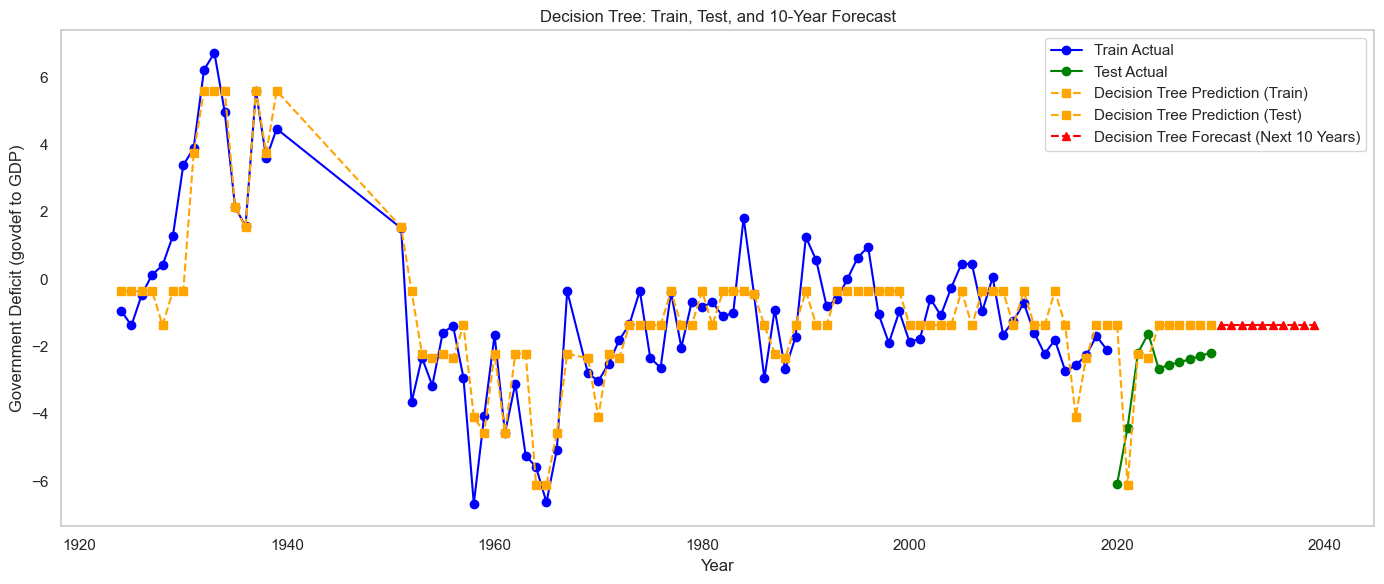

In [166]:
# Plot Decision Tree: Train, Test, and 10-year Forecast

plt.figure(figsize=(14, 6))

# Plot train and test actuals
plt.plot(y_train.index, y_train, label='Train Actual', color='blue', marker='o')
plt.plot(y_test.index, y_test, label='Test Actual', color='green', marker='o')

# Plot Decision Tree predictions on test set
plt.plot(y_train.index, y_train_pred, label='Decision Tree Prediction (Train)', color='orange', marker='s', linestyle='--')
plt.plot(y_test.index, y_pred, label='Decision Tree Prediction (Test)', color='orange', marker='s', linestyle='--')

# Forecast next 10 years using recursive prediction
future_steps = 10
last_known = y.values[-n_lags:]  # last n_lags values from the full series
future_index = pd.date_range(start=y_test.index[-1] + pd.DateOffset(years=1), periods=future_steps, freq='YS')
future_preds = []

current_lags = list(last_known)
for i in range(future_steps):
    input_features = np.array(current_lags[-n_lags:]).reshape(1, -1)
    next_pred = best_tree.predict(input_features)[0]
    future_preds.append(next_pred)
    current_lags.append(next_pred)

plt.plot(future_index, future_preds, label='Decision Tree Forecast (Next 10 Years)', color='red', marker='^', linestyle='--')

plt.title('Decision Tree: Train, Test, and 10-Year Forecast')
plt.xlabel('Year')
plt.ylabel('Government Deficit (govdef to GDP)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

Model Evaluation on Test Set:
Mean Absolute Error (MAE): 0.9061
Root Mean Squared Error (RMSE): 1.2206
R-squared (R2): 0.7662


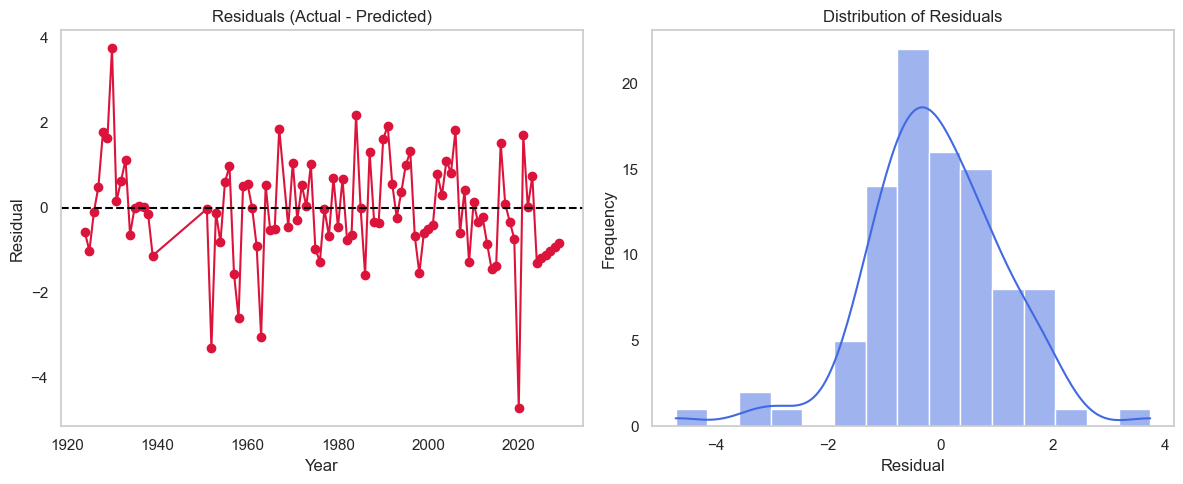


Explanation:
- The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) provide measures of average prediction error; lower values indicate better fit.
- The R-squared (R2) value shows the proportion of variance in the test data explained by the model; values closer to 1 indicate a better fit.
- The residual plot should show no clear pattern (random scatter around zero), indicating that the model has captured the structure in the data.
- The histogram of residuals should be roughly symmetric and centered at zero, suggesting unbiased predictions.
- If residuals show patterns or are not centered at zero, it may indicate model misspecification or unaccounted structure in the data.



In [167]:
# Step 9: Model Evaluation
# ------------------------
# Evaluate the Decision tree model using multiple metrics and residual analysis


# 1. Calculate predictions for the test set
pred_test = best_tree.predict(X)
actual_test = y


# 2. Evaluation Metrics
mse = mean_squared_error(actual_test, pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_test, pred_test)
r2 = r2_score(actual_test, pred_test)

print("Model Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 3. Residual Analysis
residuals = actual_test - pred_test

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X.index, residuals, marker='o', linestyle='-', color='crimson')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.grid(False)

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='royalblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(False)

plt.tight_layout()
plt.show()

# 4. Explanation:
print("""
Explanation:
- The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) provide measures of average prediction error; lower values indicate better fit.
- The R-squared (R2) value shows the proportion of variance in the test data explained by the model; values closer to 1 indicate a better fit.
- The residual plot should show no clear pattern (random scatter around zero), indicating that the model has captured the structure in the data.
- The histogram of residuals should be roughly symmetric and centered at zero, suggesting unbiased predictions.
- If residuals show patterns or are not centered at zero, it may indicate model misspecification or unaccounted structure in the data.
""")

# KNN


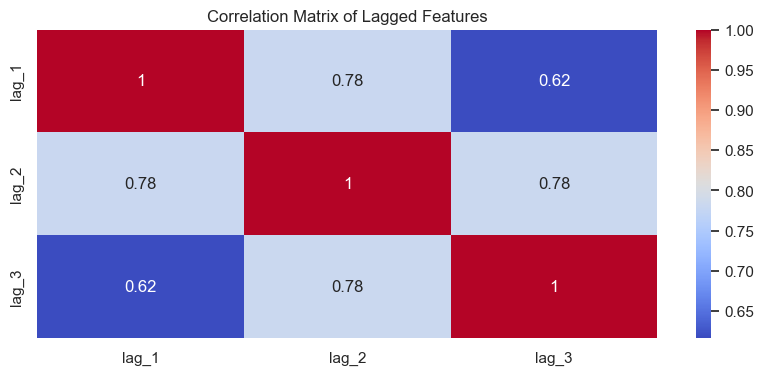

In [168]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regression for Time Series Forecasting of govdef_series
# 1. Preprocessing & EDA
# ----------------------
# The lagged_df, X, y, X_train, X_test, y_train, y_test are already prepared.
# Let's check the distribution and correlation of lagged features.

plt.figure(figsize=(10, 4))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Lagged Features')
plt.show()

In [169]:
# 2. Model Selection & Hyperparameter Tuning
# ------------------------------------------
# Use GridSearchCV with TimeSeriesSplit to find the best n_neighbors for KNN

param_grid_knn = {'n_neighbors': list(range(2, 16))}
knn = KNeighborsRegressor()
tscv = TimeSeriesSplit(n_splits=5)
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=tscv, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
print(f"Best KNN n_neighbors: {grid_search_knn.best_params_['n_neighbors']}")

Best KNN n_neighbors: 6


In [170]:
# 3. Fit the Model & Prediction
# -----------------------------
y_train_pred_knn = best_knn.predict(X_train)
y_pred_knn = best_knn.predict(X_test)

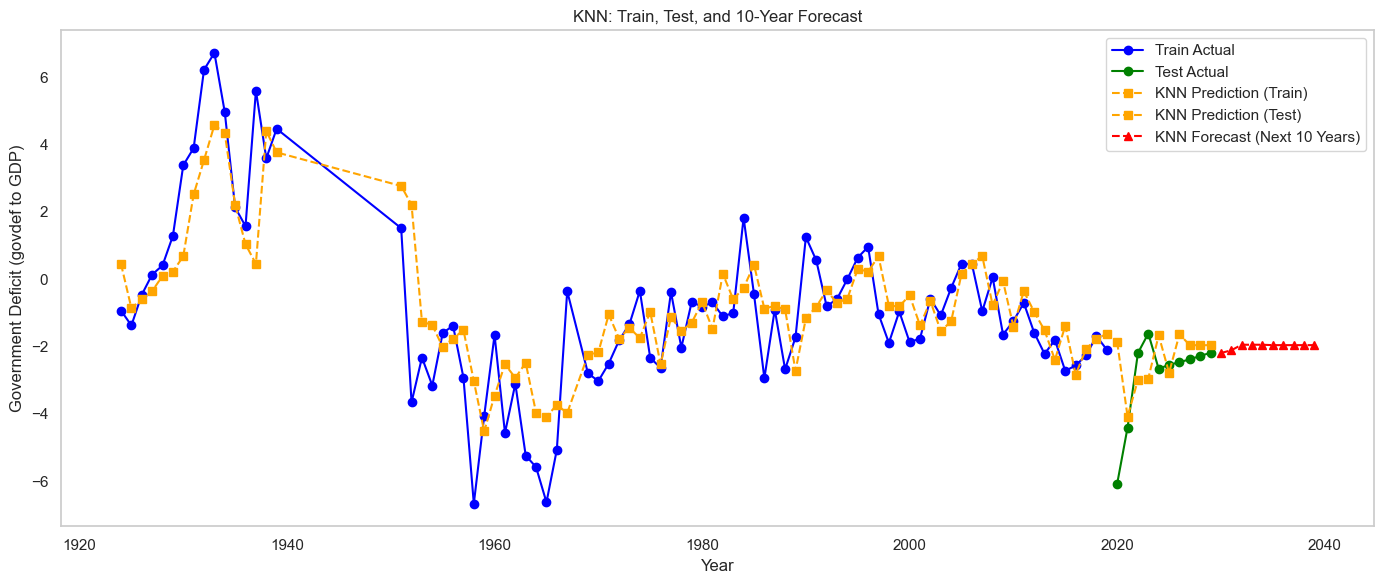

In [171]:
# 4. Forecasting (Recursive for next 10 years)
# --------------------------------------------
future_steps_knn = 10
last_known_knn = y.values[-n_lags:]
future_index_knn = pd.date_range(start=y_test.index[-1] + pd.DateOffset(years=1), periods=future_steps_knn, freq='YS')
future_preds_knn = []

current_lags_knn = list(last_known_knn)
for _ in range(future_steps_knn):
    input_features_knn = np.array(current_lags_knn[-n_lags:]).reshape(1, -1)
    next_pred_knn = best_knn.predict(input_features_knn)[0]
    future_preds_knn.append(next_pred_knn)
    current_lags_knn.append(next_pred_knn)

# 5. Visualization
# ----------------
plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train, label='Train Actual', color='blue', marker='o')
plt.plot(y_test.index, y_test, label='Test Actual', color='green', marker='o')
plt.plot(y_train.index, y_train_pred_knn, label='KNN Prediction (Train)', color='orange', marker='s', linestyle='--')
plt.plot(y_test.index, y_pred_knn, label='KNN Prediction (Test)', color='orange', marker='s', linestyle='--')
plt.plot(future_index_knn, future_preds_knn, label='KNN Forecast (Next 10 Years)', color='red', marker='^', linestyle='--')
plt.title('KNN: Train, Test, and 10-Year Forecast')
plt.xlabel('Year')
plt.ylabel('Government Deficit (govdef to GDP)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

KNN Model Evaluation on Full Data:
Mean Absolute Error (MAE): 1.0879
Root Mean Squared Error (RMSE): 1.5315
R-squared (R2): 0.6319


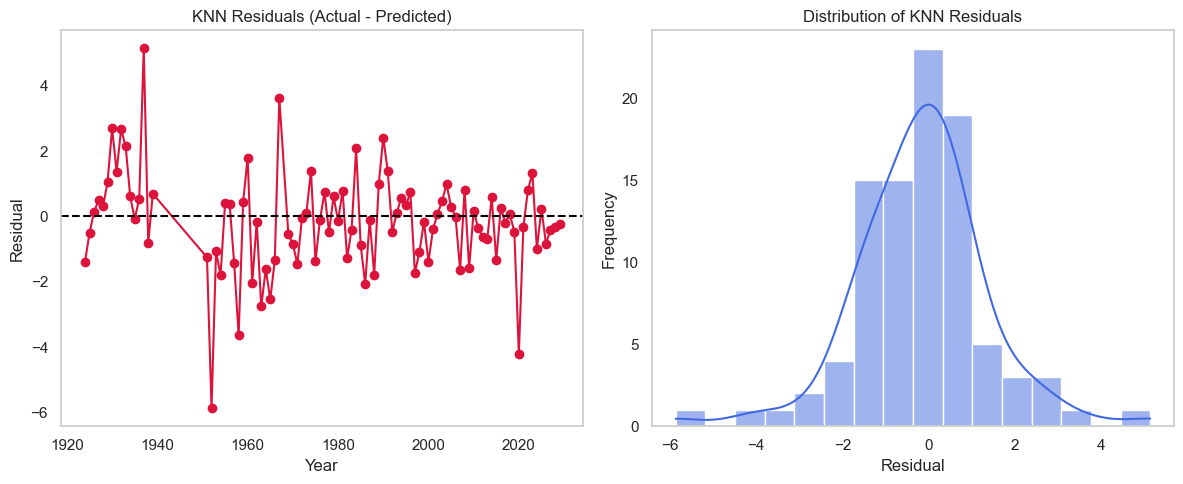

In [172]:
# 6. Evaluation
# -------------
# Evaluate the KNN model using multiple metrics and residual analysis

pred_test_knn = best_knn.predict(X)
actual_test_knn = y

mse_knn = mean_squared_error(actual_test_knn, pred_test_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(actual_test_knn, pred_test_knn)
r2_knn = r2_score(actual_test_knn, pred_test_knn)

print("KNN Model Evaluation on Full Data:")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")
print(f"R-squared (R2): {r2_knn:.4f}")

residuals_knn = actual_test_knn - pred_test_knn

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X.index, residuals_knn, marker='o', linestyle='-', color='crimson')
plt.axhline(0, color='black', linestyle='--')
plt.title('KNN Residuals (Actual - Predicted)')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.grid(False)

plt.subplot(1, 2, 2)
sns.histplot(residuals_knn, kde=True, color='royalblue')
plt.title('Distribution of KNN Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(False)

plt.tight_layout()
plt.show()

In [173]:
# 7. Explanation
print("""
Step-by-step Explanation:
1. Preprocessing & EDA: We use lagged values of the time series as features, check their correlation to ensure no multicollinearity.
2. Model Selection: We use GridSearchCV with TimeSeriesSplit to select the best number of neighbors for KNN, optimizing for lowest mean squared error.
3. Model Fitting: The best KNN model is trained on the training set and used to predict both train and test sets.
4. Forecasting: We recursively forecast the next 10 years by feeding the model with its own predictions as new lags.
5. Visualization: The plot shows actuals, predictions, and forecasts for easy comparison.
6. Evaluation: We report MAE, RMSE, and R2 for the full data, and analyze residuals for randomness and bias.
7. Interpretation: Good performance is indicated by low MAE/RMSE, high R2, and residuals that are randomly scattered and centered at zero.
""")


Step-by-step Explanation:
1. Preprocessing & EDA: We use lagged values of the time series as features, check their correlation to ensure no multicollinearity.
2. Model Selection: We use GridSearchCV with TimeSeriesSplit to select the best number of neighbors for KNN, optimizing for lowest mean squared error.
3. Model Fitting: The best KNN model is trained on the training set and used to predict both train and test sets.
4. Forecasting: We recursively forecast the next 10 years by feeding the model with its own predictions as new lags.
5. Visualization: The plot shows actuals, predictions, and forecasts for easy comparison.
6. Evaluation: We report MAE, RMSE, and R2 for the full data, and analyze residuals for randomness and bias.
7. Interpretation: Good performance is indicated by low MAE/RMSE, high R2, and residuals that are randomly scattered and centered at zero.

